In [1]:
import pandas as pd
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras import layers
import time
from IPython import display
import math

Instructions for updating:
non-resource variables are not supported in the long term


In [59]:
def get_y(x):
    return x*x

def sample_data(n, scale=100):
    data = []
    a = np.random.uniform(-10, 10)
    b = np.random.uniform(-1, 1)
    c = np.random.uniform(-10, 10)
    x = (np.random.random_sample((n,))-0.5)
    for i in range(n):
        yi = a*x[i]**2 + b*x[i] + c 
        data.append([x[i], yi])
    return np.array(data)


def pi_sample_data(n, f):
    data = []
    for i in range(n):
        x = np.random.uniform(0, 1)
        data.append([x, math.sin(x*np.pi*f) + np.random.uniform(0,1)])
    return np.array(data)
    

def sample_z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

[[ 6.18489294e-02  2.59451579e+00]
 [-9.91871600e-02  2.50753679e+00]
 [ 4.59523074e-01  4.03950073e+00]
 [ 4.12883072e-02  2.56741881e+00]
 [ 2.37058972e-01  3.01534405e+00]
 [-4.30130807e-01  3.23027615e+00]
 [ 6.16847258e-02  2.59428084e+00]
 [-8.98287374e-02  2.50473218e+00]
 [ 1.04690103e-02  2.53556936e+00]
 [-3.46632712e-01  2.93352960e+00]
 [-4.18342236e-01  3.18369982e+00]
 [ 4.12824322e-01  3.77906774e+00]
 [ 1.77093811e-01  2.83305365e+00]
 [ 2.58434280e-01  3.08995040e+00]
 [ 2.50229932e-01  3.06071642e+00]
 [-4.81256610e-01  3.45008225e+00]
 [ 2.53750634e-01  3.07317019e+00]
 [-2.08747546e-01  2.61250864e+00]
 [-2.44955758e-01  2.67642377e+00]
 [-9.96244562e-02  2.50769156e+00]
 [-3.68735396e-01  3.00456758e+00]
 [ 3.23035289e-01  3.34617989e+00]
 [ 4.88460729e-01  4.21300096e+00]
 [ 9.13279268e-02  2.64153378e+00]
 [-2.58776826e-01  2.70464933e+00]
 [-4.56234800e-01  3.33888906e+00]
 [-2.62020681e-02  2.51137581e+00]
 [-1.45697931e-01  2.53586303e+00]
 [-5.06096828e-02  2

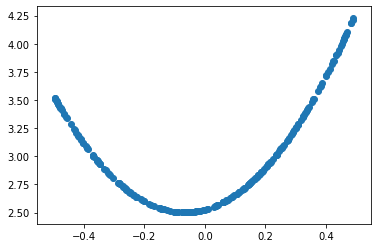

In [98]:
# PARABOLA
data = sample_data(256, 100)
plt.scatter(data[:,0], data[:,1])
# data = []
# a = np.random.uniform(0,10)
# b = np.random.uniform(-10,10)
# c = np.random.uniform(-1, 1)
# n = 256
# # x = np.random.random_sample((n,))-0.5
# for i in range(n):
#     x = np.random.uniform(0,1)-0.5
#     data.append([x, b*x**2 + c*x + a])
# data = np.array(data)
# plt.scatter(data[:,0], data[:,1])
# plt.show()

# SINE
# for i in range(256):
#     x = np.random.uniform(0, 1)
#     data.append([x, math.sin(x*np.pi*(2))+np.random.uniform(0,2)])
# data = np.array(data)
# plt.scatter(data[:,0], data[:,1])
# plt.show()

# CIRCLE
# data = []
# for i in range(1000):
#     x = np.random.uniform(0,1)
#     data.append([x**0.5, (1 - x)**0.5])
# data = np.array(data)

# plt.scatter(data[:,0], data[:,1])
# plt.show()

print(data)

Iterations: 0	 Discriminator loss: 1.3874	 Generator loss: 0.7064


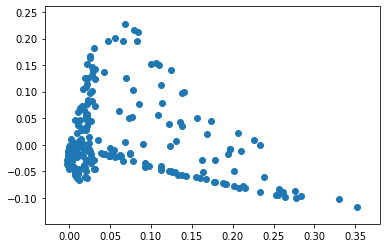

Iterations: 5000	 Discriminator loss: 1.3824	 Generator loss: 0.6804


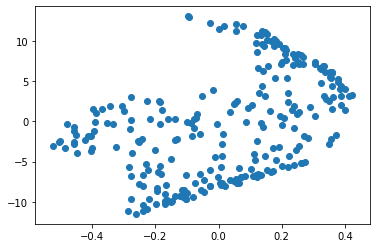

Iterations: 10000	 Discriminator loss: 1.5433	 Generator loss: 0.6661


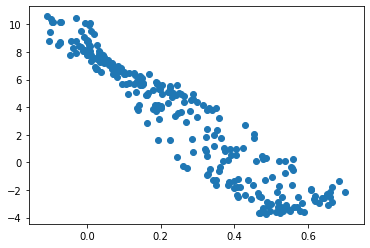

Iterations: 15000	 Discriminator loss: 1.4467	 Generator loss: 0.7054


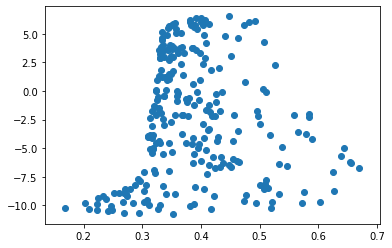

Iterations: 20000	 Discriminator loss: 1.3765	 Generator loss: 0.6581


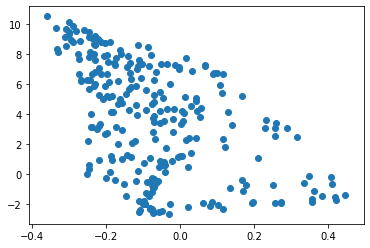

Iterations: 25000	 Discriminator loss: 1.6406	 Generator loss: 0.6610


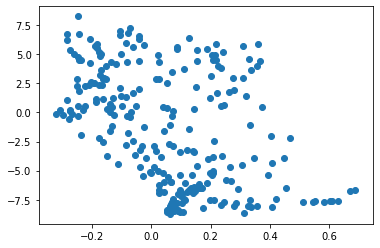

In [92]:
tf.reset_default_graph()

def generator(z, hsize=[5,10, 20], reuse=False):
    with tf.variable_scope("GAN/Generator", reuse=reuse) as scope:
        h1 = tf.layers.dense(z, hsize[0], activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1, hsize[1], activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2, hsize[2], activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h3, 2)
    return out

def discriminator(x, hsize=[15,15], reuse=False):
    with tf.variable_scope("GAN/Discriminator", reuse=reuse):
        h1 = tf.layers.dense(x, hsize[0], activation = tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1, hsize[1], activation = tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2, 2)
        out = tf.layers.dense(h3, 1)
    return out, h3

x = tf.placeholder(tf.float32, [None, 2])
z = tf.placeholder(tf.float32, [None, 2])

G_sample = generator(z)
r_logits, r_rep = discriminator(x)
f_logits, g_rep = discriminator(G_sample, reuse=True)
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits, labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits, labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits, labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="GAN/Discriminator")
gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss, var_list = gen_vars)
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss, var_list = disc_vars)

sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 256
nd_steps = 10
ng_steps = 10
# x_data = sample_data(batch_size)
# x_data = pi_sample_data(batch_size, 2)
for i in range(30000):
    x_batch = sample_data(n=batch_size)
#     x_batch = pi_sample_data(batch_size, 2)
#     x_batch = x_data
    z_batch = sample_z(batch_size, 2)
    _, dloss = sess.run([disc_step, disc_loss], feed_dict={x: x_batch, z: z_batch})
    _, gloss = sess.run([gen_step, gen_loss], feed_dict = {z: z_batch})
    if i%5000 == 0:
        print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))
        g_plot = sess.run(G_sample, feed_dict={z: z_batch})
        plt.scatter(g_plot[:,0], g_plot[:,1])
        plt.show()


In [42]:
def discriminator(x, hsize=[16,16], reuse=False):
    with tf.variable_scope("GAN/Discriminator", reuse=reuse):
        h1 = tf.layers.dense(x, hsize[0], activation = tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1, hsize[1], activation = tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2, 2)
        out = tf.layers.dense(h3, 1)
    return out, h3

In [12]:
# test = np.random.uniform(-1., 1., size=[10, 3])
# print(test)

z = tf.placeholder(tf.float32, [None, 2])
test = generator(z, reuse=True)

with tf.Session() as s:
    tf.global_variables_initializer().run(session=s)
    a = np.random.uniform(-1., 1., size=[10000, 2])
# with tf.("GAN/Generator", reuse=True) as scope:
# test = generator(np.random.uniform(-1., 1., size=[10, 2]))
    x_points = []
    y_points = []
    for i in range(a.shape[0]-1):
        c = s.run([test], feed_dict = {z: a[i].reshape(1,2)})
        for i in c:
            x_points.append(np.asarray(i[0])[0])
            y_points.append(np.asarray(i[0])[1])

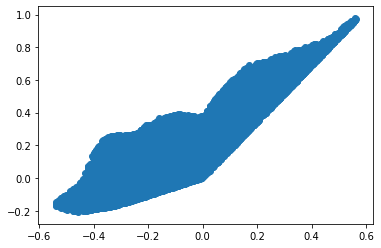

In [13]:
plt.scatter(x_points, y_points)
# for i in range(len(x_points)):
#     print(x_points[i] , y_points[i] )
# print(x_points)
# print(y_points)